#Trabalho de Inteligência Computacional

Alunos: <br> Alex Carrijo Guimarães – 201910805 <br>
Isabella Guimarães Aguiar de Faria – 201703712<br>
Pedro Henrique Fernandes Ribeiro – 202009532

#Importação do Dataset

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import os
os.chdir("/content/drive/MyDrive/Inteligência Computacional/Dataset") # replace 'your_folder'
!ls

heart.csv  o2Saturation.csv


#Análise do Dataset

In [20]:
import pandas as pd

heart = pd.read_csv('heart.csv')
# Verificar valores nulos
print(heart.isna())

# Contar valores nulos por coluna
print(heart.isna().sum())

# Contar valores nulos por linha
print(heart.isna().sum(axis=1))

       age    sex     cp  trtbps   chol    fbs  restecg  thalachh   exng  \
0    False  False  False   False  False  False    False     False  False   
1    False  False  False   False  False  False    False     False  False   
2    False  False  False   False  False  False    False     False  False   
3    False  False  False   False  False  False    False     False  False   
4    False  False  False   False  False  False    False     False  False   
..     ...    ...    ...     ...    ...    ...      ...       ...    ...   
298  False  False  False   False  False  False    False     False  False   
299  False  False  False   False  False  False    False     False  False   
300  False  False  False   False  False  False    False     False  False   
301  False  False  False   False  False  False    False     False  False   
302  False  False  False   False  False  False    False     False  False   

     oldpeak    slp    caa  thall  output  
0      False  False  False  False   False  

In [21]:
# Verificar strings vazias
print(heart == '')

# Contar strings vazias por coluna
print((heart == '').sum())

# Contar strings vazias por linha
print((heart == '').sum(axis=1))

       age    sex     cp  trtbps   chol    fbs  restecg  thalachh   exng  \
0    False  False  False   False  False  False    False     False  False   
1    False  False  False   False  False  False    False     False  False   
2    False  False  False   False  False  False    False     False  False   
3    False  False  False   False  False  False    False     False  False   
4    False  False  False   False  False  False    False     False  False   
..     ...    ...    ...     ...    ...    ...      ...       ...    ...   
298  False  False  False   False  False  False    False     False  False   
299  False  False  False   False  False  False    False     False  False   
300  False  False  False   False  False  False    False     False  False   
301  False  False  False   False  False  False    False     False  False   
302  False  False  False   False  False  False    False     False  False   

     oldpeak    slp    caa  thall  output  
0      False  False  False  False   False  

Descrição estatística dos dados:
          count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trtbps    303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalachh  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exng      303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slp       303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
caa       303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thall

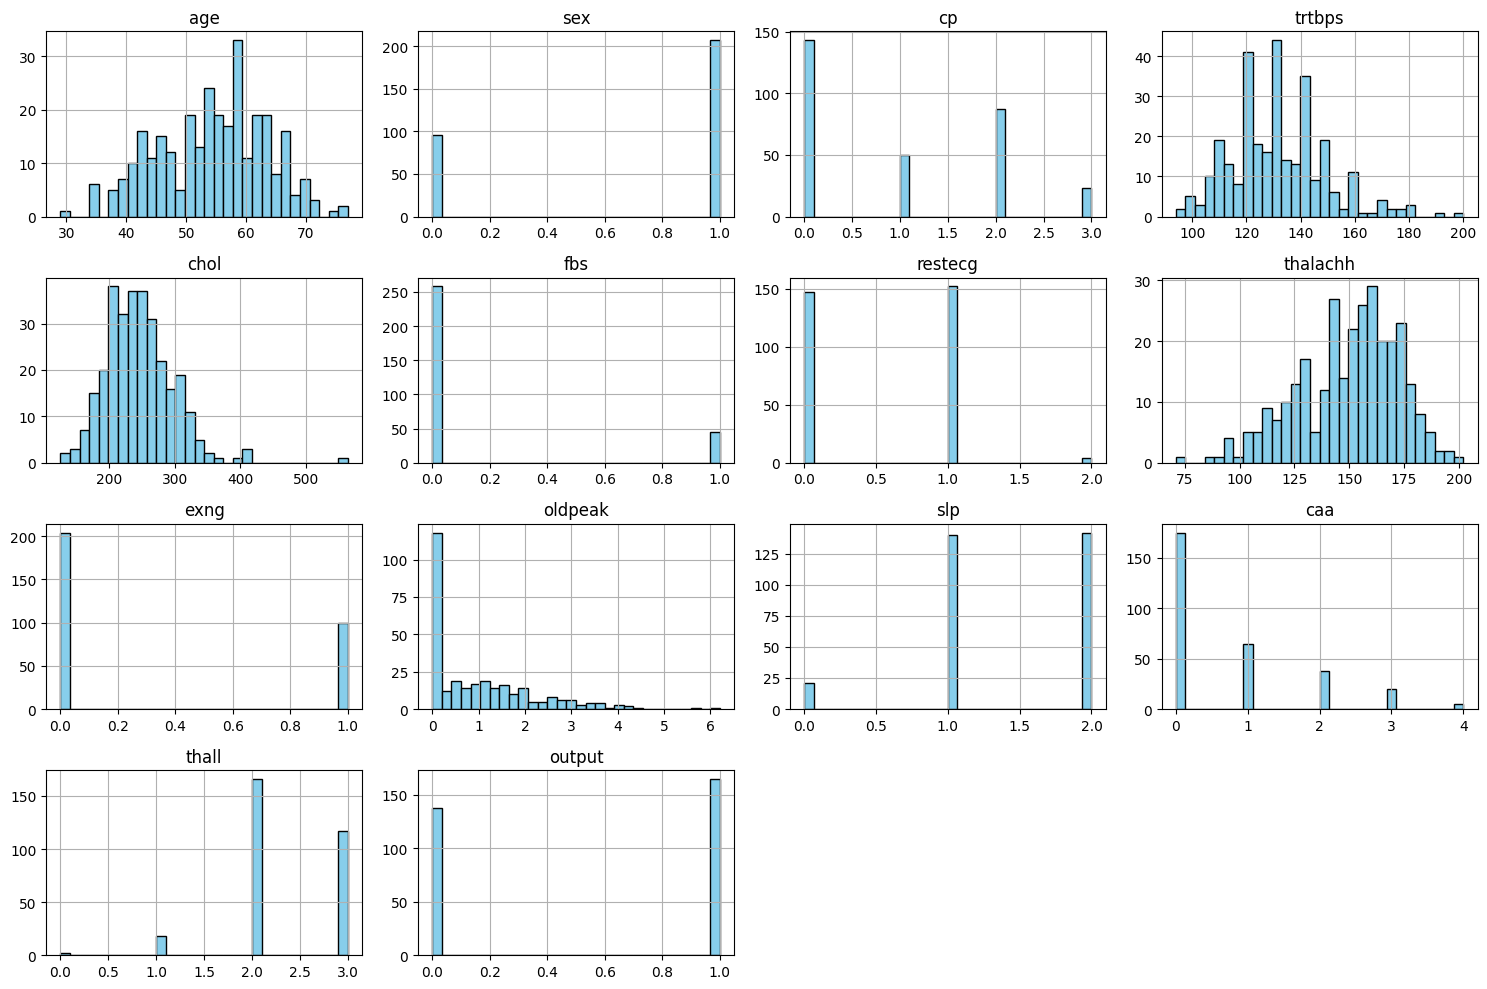

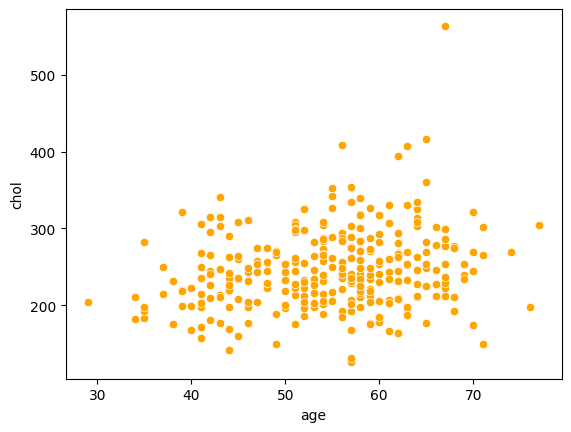

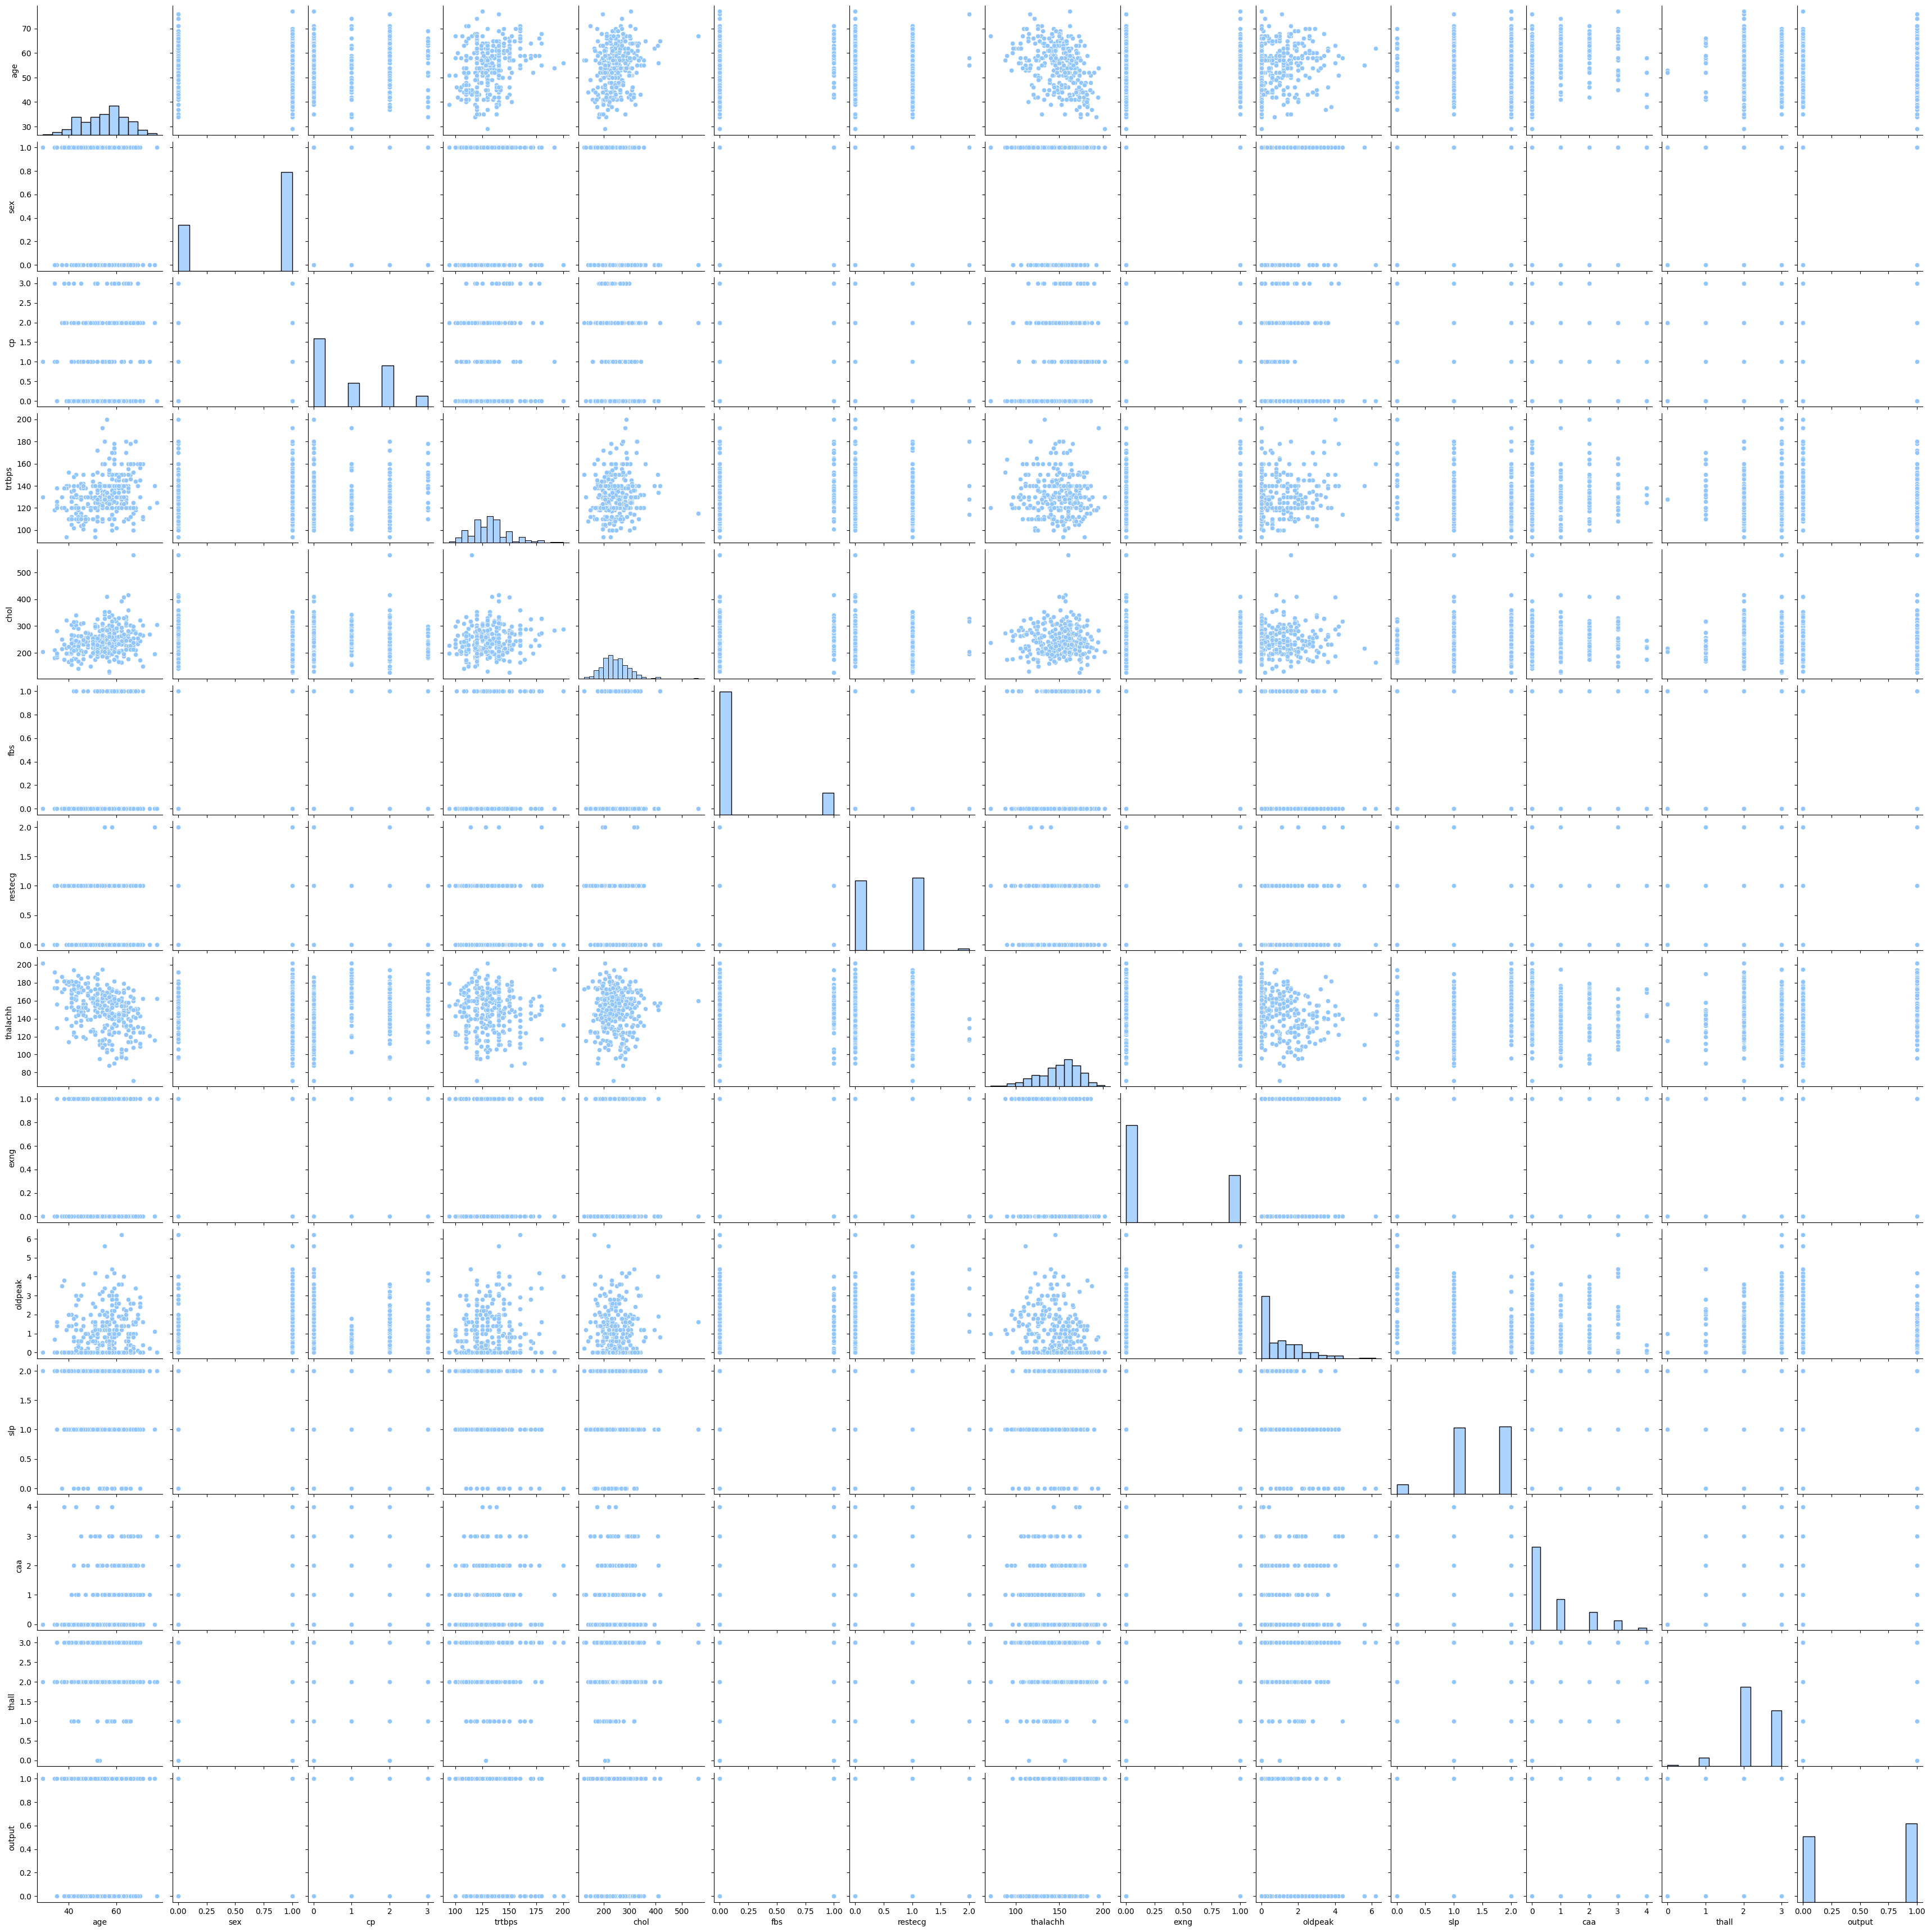

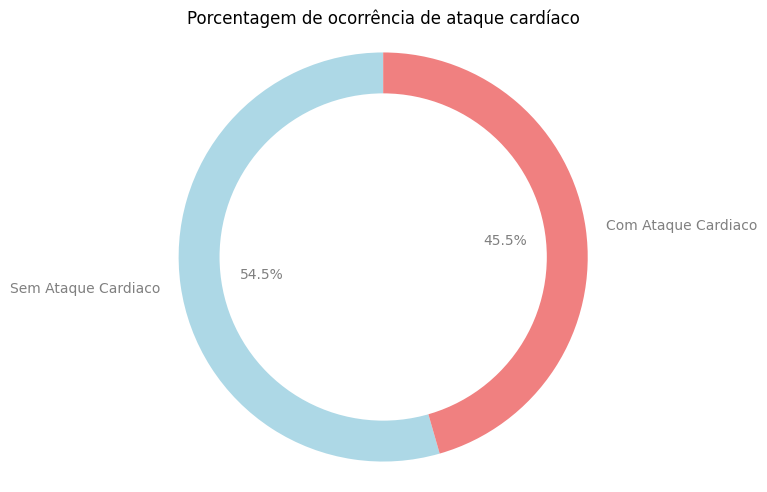

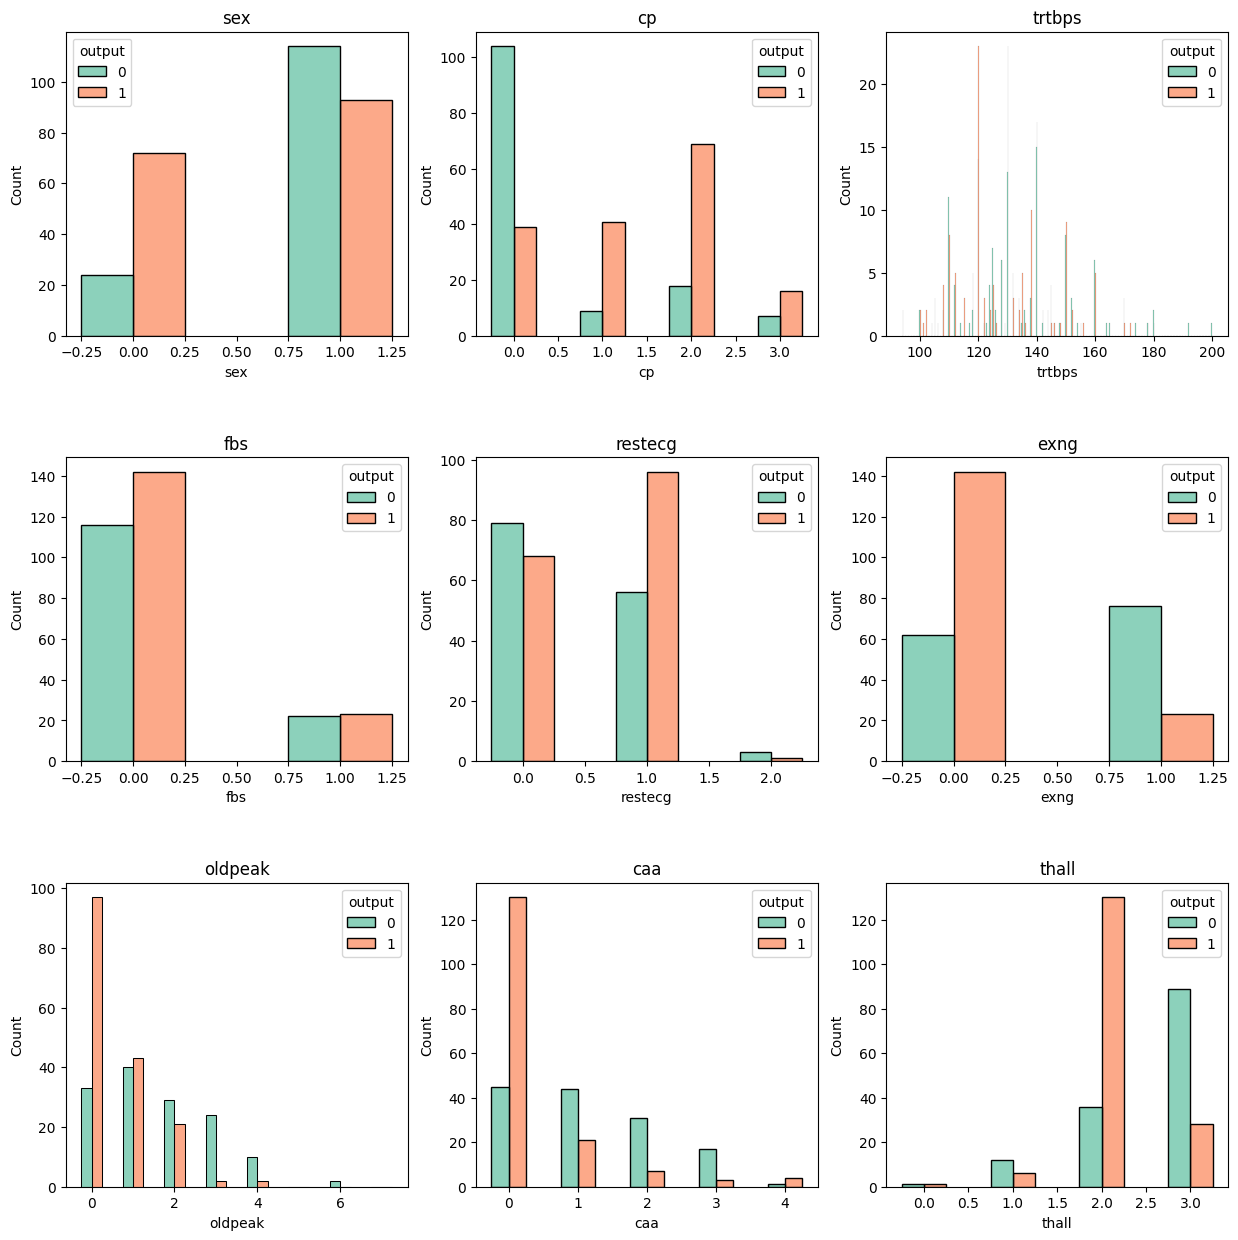

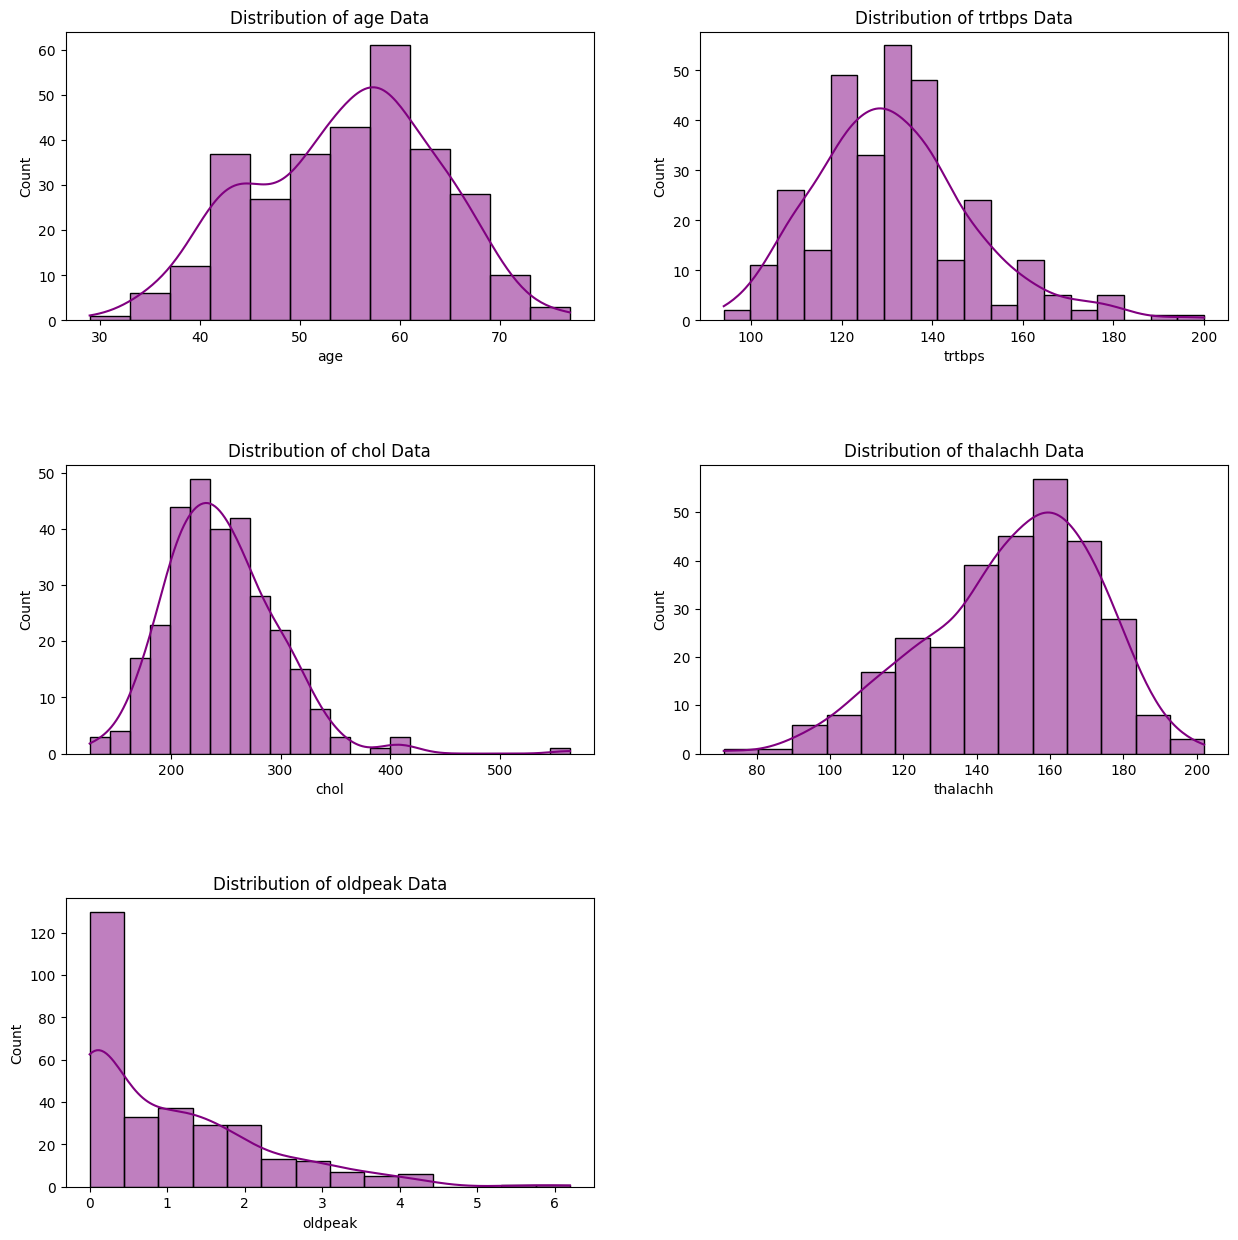

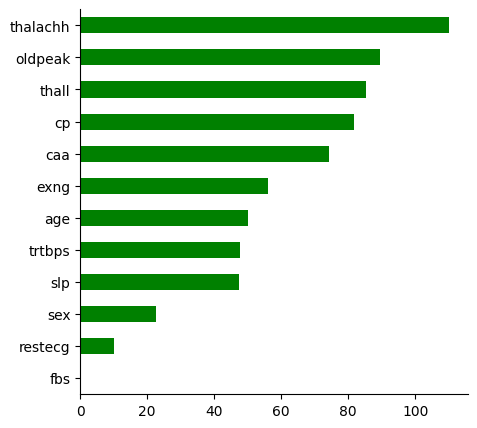

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Estilizar os gráficos
plt.style.use('seaborn-v0_8-pastel')

# Carregar os dados
df = pd.read_csv('heart.csv')

# Descrição estatística dos dados
print("Descrição estatística dos dados:")
print(df.describe().transpose())

# Histograma de todas as colunas
df.hist(figsize=(15, 10), bins=30, edgecolor='black', color='skyblue')
plt.tight_layout()
plt.show()

# Gráfico scatter plot para duas variáveis (substitua 'age' e 'cholesterol' pelos nomes reais das colunas)
if 'age' in df.columns and 'chol' in df.columns:
    sns.scatterplot(data=df, x='age', y='chol', color='orange')
    plt.show()
else:
    print("As colunas 'age' e 'chol' não foram encontradas no DataFrame.")

# Gráfico scatter plot para todas as combinações de variáveis
sns.pairplot(df)
plt.show()

# Gráfico de pizza para a distribuição de ocorrências de ataque cardíaco
if 'output' in df.columns:
    counts = df['output'].value_counts(dropna=False)
    labels = ['Sem Ataque Cardiaco', 'Com Ataque Cardiaco']
    fig1, ax1 = plt.subplots()
    patches, texts, autotexts = ax1.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

    centre_circle = plt.Circle((0, 0), 0.80, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    for text in texts:
        text.set_color('grey')
    for autotext in autotexts:
        autotext.set_color('grey')
    plt.axis('equal')
    plt.tight_layout()
    plt.title('Porcentagem de ocorrência de ataque cardíaco')
    plt.show()
else:
    print("A coluna 'output' não foi encontrada no DataFrame.")

# Histogramas para características categóricas
cat_features = ['sex', 'cp', 'trtbps', 'fbs', 'restecg', 'exng', 'oldpeak', 'caa', 'thall']  # Substitua pelos nomes reais das colunas categóricas
n_cat_features = len(cat_features)
n_cols = 3
n_rows = (n_cat_features + n_cols - 1) // n_cols  # Calcular o número de linhas necessário

plt.figure(figsize=(15, 5 * n_rows))
plt.subplots_adjust(hspace=0.4)
for i, name in enumerate(cat_features):
    if name in df.columns:
        ax = plt.subplot(n_rows, n_cols, i + 1)
        s = sns.histplot(data=df, x=name, hue="output", multiple="dodge", discrete=True, shrink=0.5, palette='Set2')
        ax.set_title(name)
    else:
        print(f"A coluna '{name}' não foi encontrada no DataFrame.")
plt.show()

# Distribuição das características numéricas
num_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']  # Substitua pelos nomes reais das colunas numéricas
n_num_features = len(num_features)
n_cols = 2
n_rows = (n_num_features + n_cols - 1) // n_cols  # Calcular o número de linhas necessário

plt.figure(figsize=(15, 5 * n_rows))
plt.subplots_adjust(hspace=0.5)
for i, col in enumerate(num_features, 1):
    if col in df.columns:
        plt.subplot(n_rows, n_cols, i)
        plt.title(f"Distribution of {col} Data")
        sns.histplot(df[col], kde=True, color='purple')
    else:
        print(f"A coluna '{col}' não foi encontrada no DataFrame.")
plt.show()

# Calcular chisqmatrix
chisqmatrix = pd.DataFrame(index=df.columns[:-1], columns=['output'])
for column in df.columns[:-1]:
    contingency_table = pd.crosstab(df[column], df['output'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chisqmatrix.loc[column, 'output'] = chi2

# Adicionar gráfico de barras horizontais usando 'chisqmatrix' e 'output'
plt.figure(figsize=(5, 5))
sns.set_palette("pastel")
abs(chisqmatrix['output']).sort_values()[:-1].plot.barh(color='green')
sns.despine()
plt.show()

In [23]:
heart = pd.read_csv('heart.csv')
saturation = pd.read_csv('o2Saturation.csv')

In [24]:
heart.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

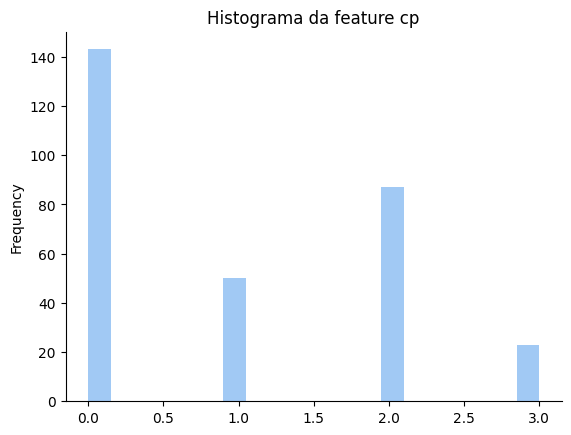

In [25]:
# Exemplo de visualização com matplotlib (histograma para a feature 'cp')
from matplotlib import pyplot as plt
heart['cp'].plot(kind='hist', bins=20, title='Histograma da feature cp')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [26]:
print(heart.columns)

# Substitua 'output' pelo nome correto da variável alvo, se necessário
X_heart = heart.drop('output', axis=1)
y_heart = heart['output']

# Dividir dados em treino e teste
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

# Padronizar os dados
scaler_heart = StandardScaler()
X_train_heart = scaler_heart.fit_transform(X_train_heart)
X_test_heart = scaler_heart.transform(X_test_heart)

# Ajustar a forma dos dados para CNN (adicionar uma dimensão para os "canais")
X_train_heart = np.expand_dims(X_train_heart, axis=-1)
X_test_heart = np.expand_dims(X_test_heart, axis=-1)

print("Forma dos dados de treinamento:", X_train_heart.shape)
print("Forma dos dados de teste:", X_test_heart.shape)

# Exibir os primeiros registros do dataset saturation para verificação
print(saturation.head())

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')
Forma dos dados de treinamento: (242, 13, 1)
Forma dos dados de teste: (61, 13, 1)
   98.6
0  98.6
1  98.6
2  98.6
3  98.1
4  97.5


#CNN

In [27]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [28]:
# Ajustar o comprimento da entrada
input_length = X_train_heart.shape[1]

# Definir o modelo CNN ajustado com padding
model_heart = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(input_length, 1)),  # Convolução 1D
    BatchNormalization(),  # Normalização em lote
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Definir um otimizador adaptativo
optimizer = Adam(learning_rate=0.001)

# Configurar callbacks para ajustar a taxa de aprendizado
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Compilar o modelo
model_heart.compile(optimizer=optimizer,
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Resumo do modelo
print(model_heart.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 32)            128       
                                                                 
 batch_normalization (Batch  (None, 13, 32)            128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 6, 32)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 64)             6208      
                                                                 
 batch_normalization_1 (Bat  (None, 6, 64)             256       
 chNormalization)                                                
                                                        

In [29]:
# Treinar o modelo com callbacks
history_heart = model_heart.fit(X_train_heart, y_train_heart, epochs=100, batch_size=64,
                                validation_data=(X_test_heart, y_test_heart),
                                callbacks=[reduce_lr])

# Avaliar o modelo
loss_heart, accuracy_heart = model_heart.evaluate(X_test_heart, y_test_heart)
print(f'Acurácia do modelo: {accuracy_heart * 100:.2f}%')

# Previsões no conjunto de teste
y_pred_heart = model_heart.predict(X_test_heart)
y_pred_class_heart = np.where(y_pred_heart > 0.5, 1, 0)

# Métricas de avaliação
accuracy = accuracy_score(y_test_heart, y_pred_class_heart)
precision = precision_score(y_test_heart, y_pred_class_heart)
recall = recall_score(y_test_heart, y_pred_class_heart)
f1 = f1_score(y_test_heart, y_pred_class_heart)
conf_mat_heart = confusion_matrix(y_test_heart, y_pred_class_heart)

# Calcular especificidade
tn, fp, fn, tp = conf_mat_heart.ravel()
specificity = tn / (tn + fp)

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Sensibilidade (Recall): {recall:.2f}')
print(f'Especificidade: {specificity:.2f}')
print(f'F1 Score: {f1:.2f}')

# Matriz de Confusão
conf_mat_heart = confusion_matrix(y_test_heart, y_pred_class_heart)
print('Matriz de Confusão:')
print(conf_mat_heart)

Epoch 1/100
4/4 [==============================] - 3s 142ms/step - loss: 3.1186 - accuracy: 0.5537 - val_loss: 2.7843 - val_accuracy: 0.4754 - lr: 0.0010
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 2.8878 - accuracy: 0.5785 - val_loss: 2.7487 - val_accuracy: 0.4754 - lr: 0.0010
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 2.6028 - accuracy: 0.7190 - val_loss: 2.7081 - val_accuracy: 0.4754 - lr: 0.0010
Epoch 4/100
4/4 [==============================] - 0s 27ms/step - loss: 2.6585 - accuracy: 0.6570 - val_loss: 2.6665 - val_accuracy: 0.4754 - lr: 0.0010
Epoch 5/100
4/4 [==============================] - 0s 20ms/step - loss: 2.5134 - accuracy: 0.7314 - val_loss: 2.6243 - val_accuracy: 0.5574 - lr: 0.0010
Epoch 6/100
4/4 [==============================] - 0s 25ms/step - loss: 2.4028 - accuracy: 0.7686 - val_loss: 2.5821 - val_accuracy: 0.6066 - lr: 0.0010
Epoch 7/100
4/4 [==============================] - 0s 19ms/step - loss: 2.3822 - 

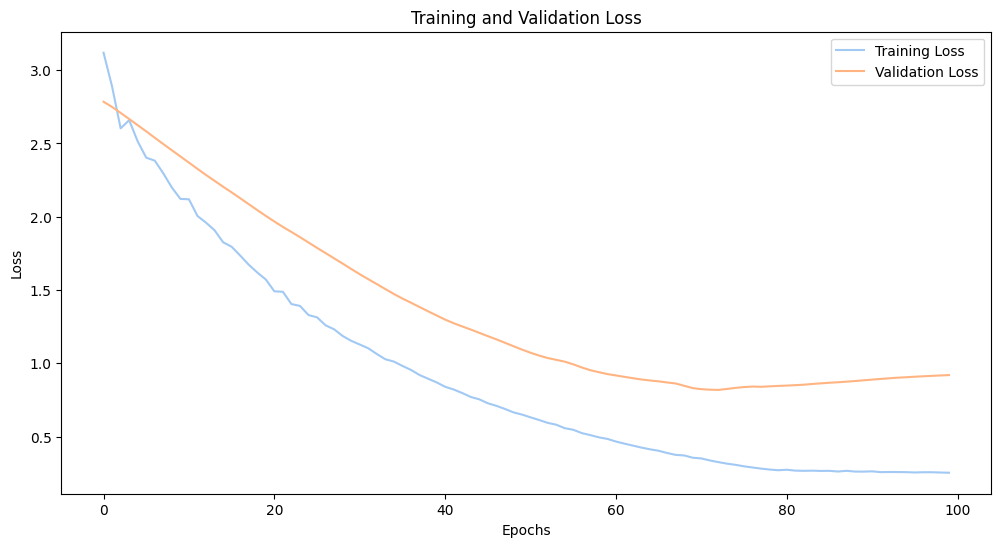

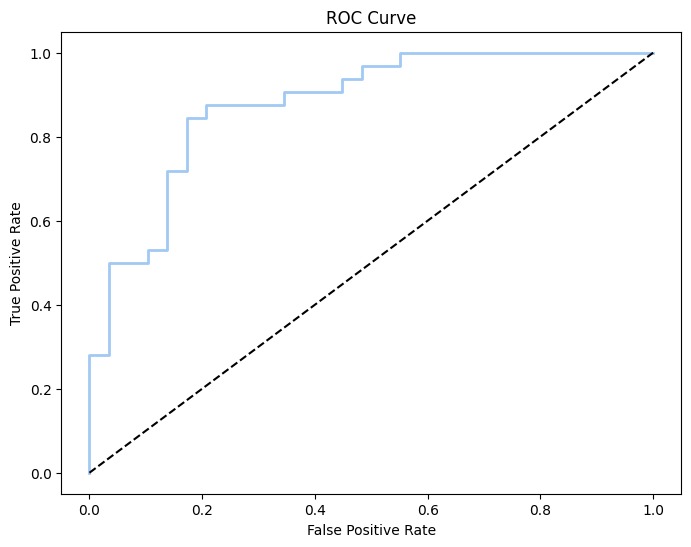

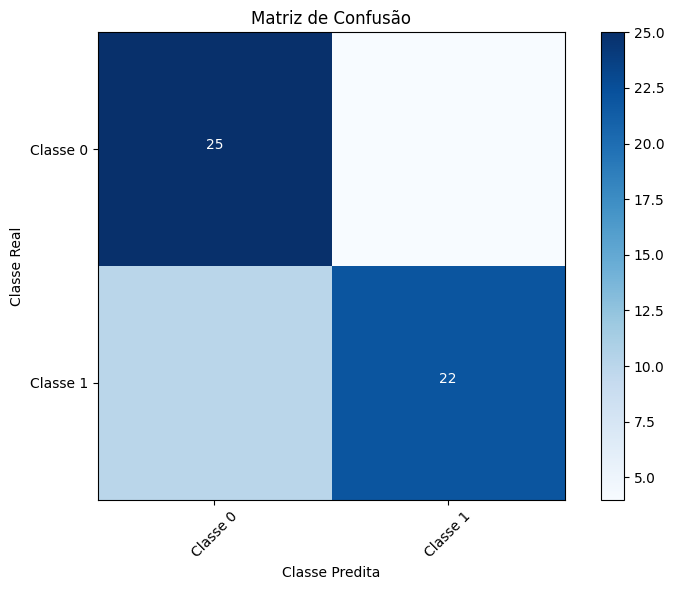

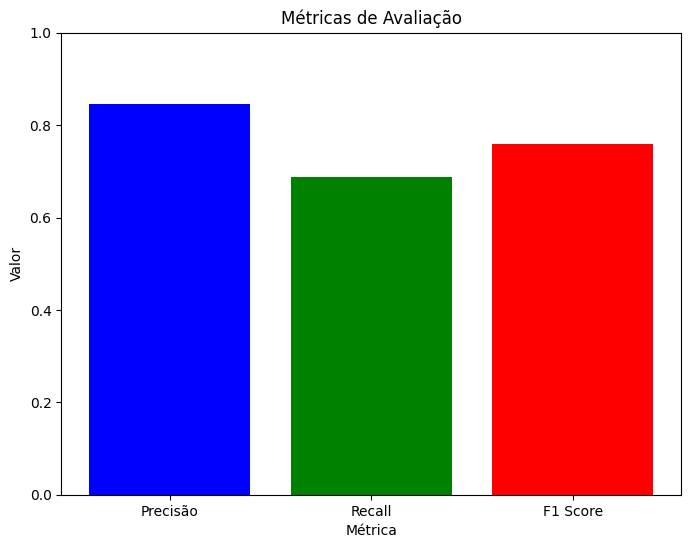

In [30]:
# Curva de Aprendizado
plt.figure(figsize=(12, 6))
plt.plot(history_heart.history['loss'], label='Training Loss')
plt.plot(history_heart.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Curva ROC
fpr_heart, tpr_heart, thresholds_heart = roc_curve(y_test_heart, y_pred_heart)
plt.figure(figsize=(8, 6))
plt.plot(fpr_heart, tpr_heart, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Matriz de Confusão como gráfico
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_heart, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
classes = ['Classe 0', 'Classe 1']  # Substitua pelos nomes das classes se disponível
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i, j in enumerate(np.arange(len(conf_mat_heart))):
    plt.text(j, i, format(conf_mat_heart[i, j], 'd'), horizontalalignment="center",
             color="white" if conf_mat_heart[i, j] > conf_mat_heart.max() / 2. else "black")

plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.tight_layout()
plt.show()

# Gráfico de Precisão, Recall e F1 Score
metrics_names = ['Precisão', 'Recall', 'F1 Score']
metrics_values = [precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Métricas de Avaliação')
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.show()

1/1 [==============================] - 0s 158ms/step


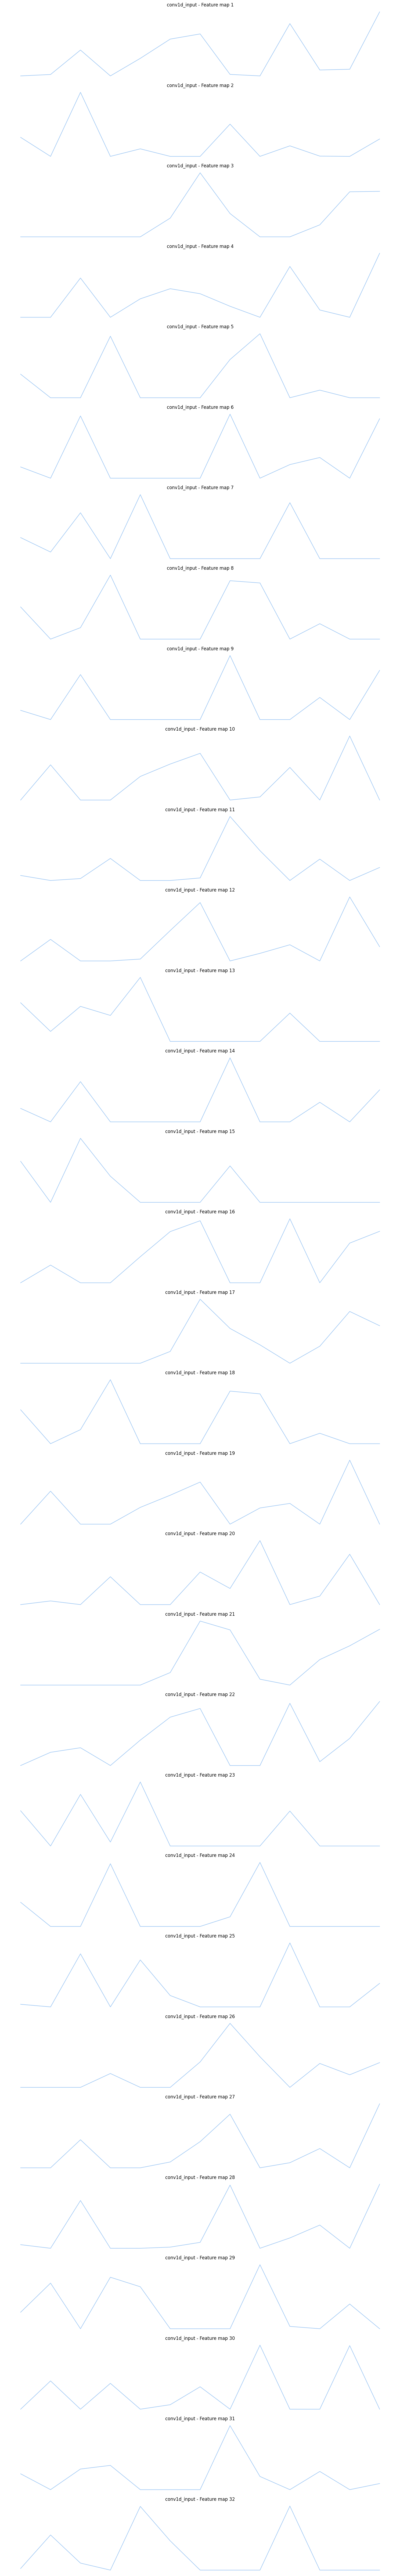

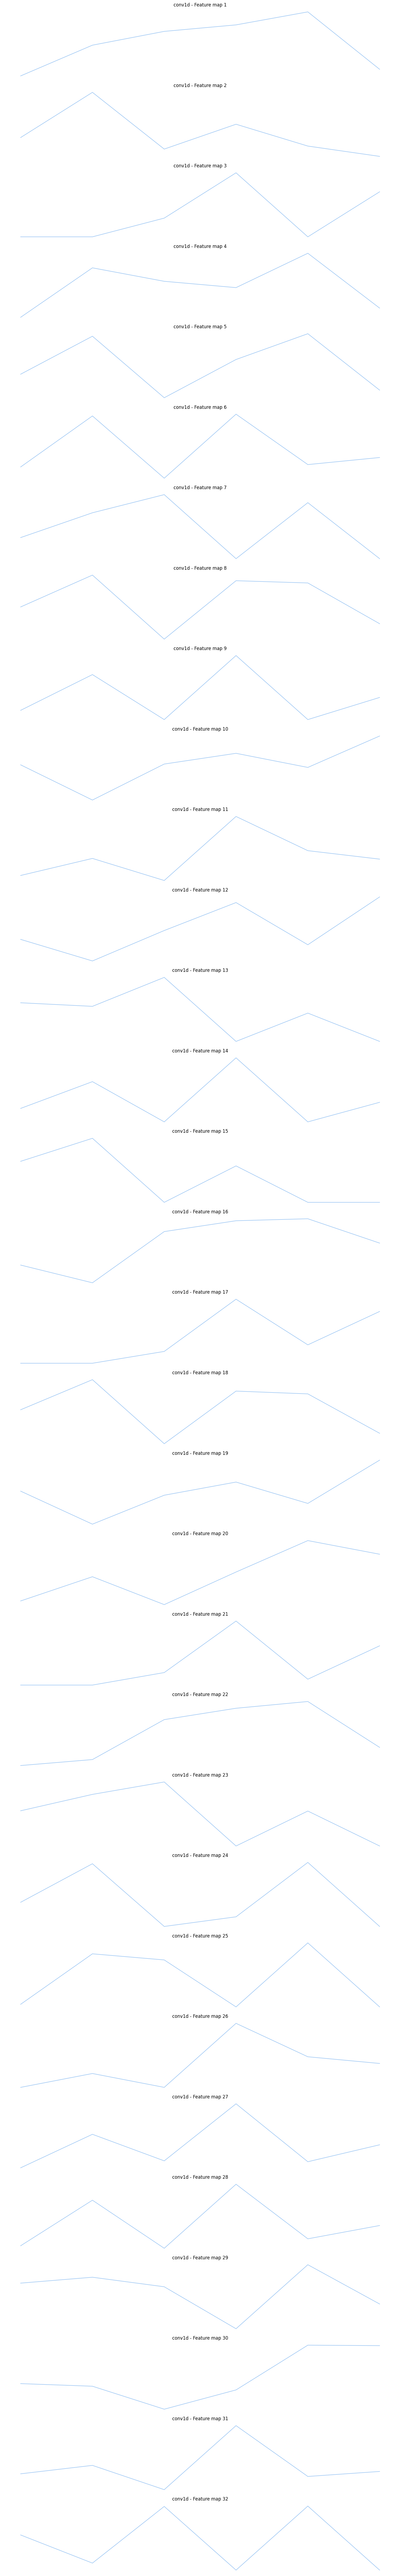

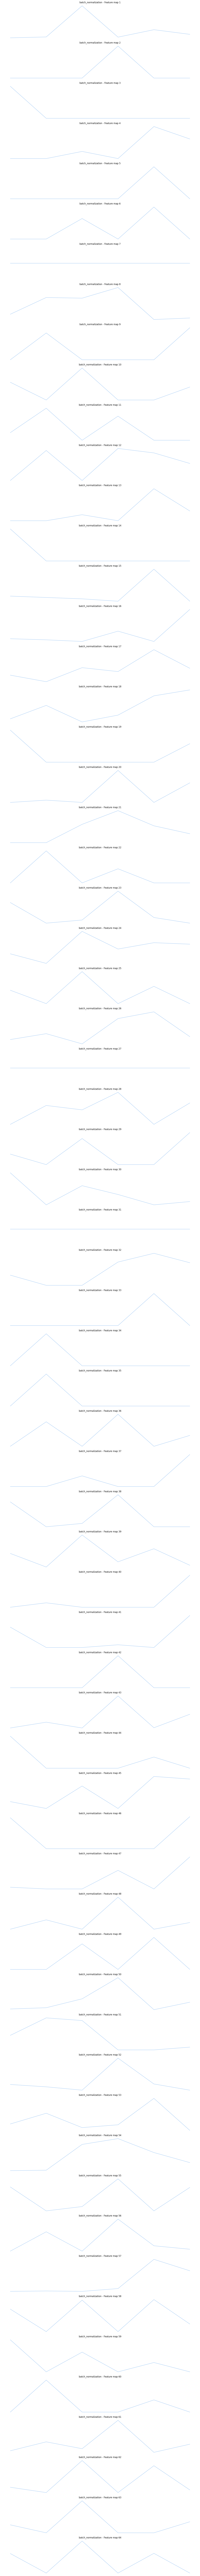

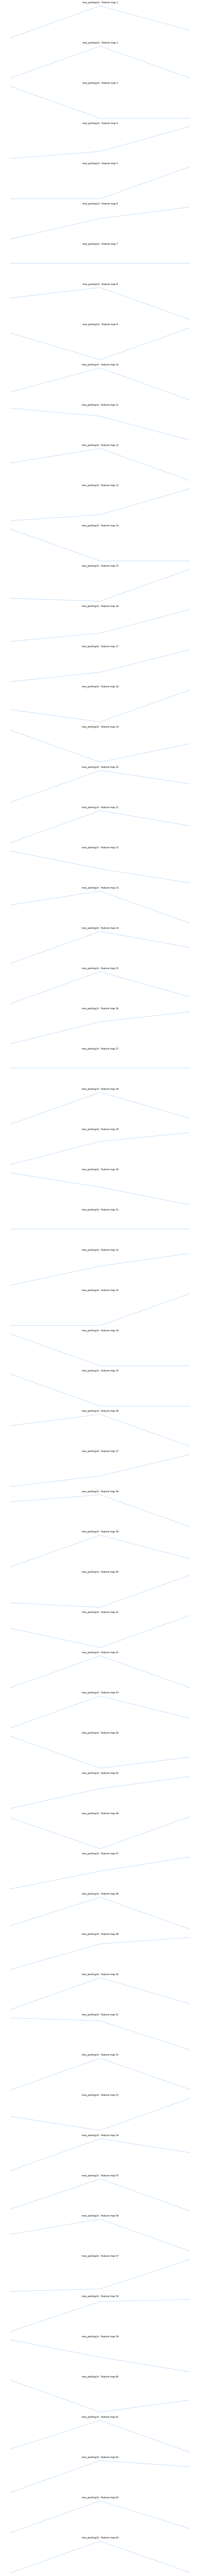

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

def create_visualization_model(original_model):
    # Obter a lista das camadas convolucionais e de pooling
    conv_layers = [layer for layer in original_model.layers if isinstance(layer, (Conv1D, MaxPooling1D))]

    # Criar um modelo para retornar as ativações das camadas convolucionais
    activation_model = Model(inputs=original_model.input, outputs=[layer.output for layer in conv_layers])
    return activation_model

def plot_activations(activations, layer_names):
    for i, activation in enumerate(activations):
        num_features = activation.shape[-1]
        plt.figure(figsize=(15, num_features * 3))
        for j in range(num_features):
            plt.subplot(num_features, 1, j + 1)
            plt.plot(activation[0, :, j])
            plt.title(f'{layer_names[i]} - Feature map {j + 1}')
            plt.axis('off')
        plt.tight_layout()
        plt.show()

# Criar o modelo de visualização
activation_model = create_visualization_model(model_heart)

# Selecionar uma amostra dos dados de entrada
sample_input = X_test_heart[0:1]  # Use apenas uma amostra para visualizar as ativações

# Obter as ativações das camadas
activations = activation_model.predict(sample_input)

# Obter os nomes das camadas
layer_names = [layer.name for layer in activation_model.layers]

# Plotar as ativações
plot_activations(activations, layer_names)

#MLP

In [32]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [34]:
# Definir seed para todas as fontes de aleatoriedade
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)

In [35]:
# Carregar os dados
data = pd.read_csv('heart.csv')

In [36]:
# Separar características e rótulo
X = data.drop(columns=['output']).values
y = data['output'].values

In [37]:
# Dividir em dados de treino e teste
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [38]:
# Normalizar os dados
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

In [39]:
# Calcular pesos das classes
class_weights = torch.tensor([1.0, 2.0], dtype=torch.float)

In [40]:
# Definição do modelo
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = nn.Linear(13, 512)
        self.dense2 = nn.Linear(512, 256)
        self.dense3 = nn.Linear(256, 128)
        self.dense4 = nn.Linear(128, 64)
        self.dense5 = nn.Linear(64, 32)
        self.dense6 = nn.Linear(32, 16)
        self.dense7 = nn.Linear(16, 8)
        self.dropout = nn.Dropout(0.3)
        self.output_layer = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.l2_reg = 0.01

    def forward(self, x):
        x = self.relu(self.dense1(x))
        x = self.relu(self.dense2(x))
        x = self.relu(self.dense3(x))
        x = self.relu(self.dense4(x))
        x = self.relu(self.dense5(x))
        x = self.relu(self.dense6(x))
        x = self.relu(self.dense7(x))
        x = self.dropout(x)
        x = self.sigmoid(self.output_layer(x))
        return x

In [41]:
# Configurações para Cross-Validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

fold_no = 1
accuracies = []
precisions = []
recalls = []
f1s = []
train_losses = []
val_losses = []
roc_auc_scores = []

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [42]:
for train_index, val_index in kfold.split(X_train_full, y_train_full):
    X_train, X_val = X_train_full[train_index], X_train_full[val_index]
    y_train, y_val = y_train_full[train_index], y_train_full[val_index]

    # Convertendo os dados para tensores
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    X_val = torch.tensor(X_val, dtype=torch.float32)
    y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

    # Criar DataLoader para o conjunto de treino e validação
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Instanciar e compilar o modelo
    model = MyModel().to(device)
    criterion = nn.BCELoss(weight=class_weights[1].to(device))
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Treinar o modelo
    best_val_loss = float('inf')
    patience = 10
    patience_counter = 0

    fold_train_losses = []
    fold_val_losses = []

    for epoch in range(100):
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            l2_reg = torch.tensor(0., requires_grad=True)
            for param in model.parameters():
                l2_reg = l2_reg + param.norm(2)
            loss = loss + model.l2_reg * l2_reg
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)

        train_loss = train_loss / len(train_loader.dataset)
        fold_train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                l2_reg = torch.tensor(0., requires_grad=True)
                for param in model.parameters():
                    l2_reg = l2_reg + param.norm(2)
                loss = loss + model.l2_reg * l2_reg
                val_loss += loss.item() * inputs.size(0)

        val_loss = val_loss / len(val_loader.dataset)
        fold_val_losses.append(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_wts = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                break

    model.load_state_dict(best_model_wts)
    model.eval()

    val_accuracy = 0.0
    val_preds = []
    val_targets = []
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            preds = (outputs > 0.5).float()
            val_accuracy += (preds == targets).float().mean().item()
            val_preds.extend(preds.cpu().numpy())
            val_targets.extend(targets.cpu().numpy())

    val_accuracy = val_accuracy / len(val_loader)
    accuracies.append(val_accuracy)

    val_preds = np.array(val_preds).flatten()
    val_targets = np.array(val_targets).flatten()

    precision = precision_score(val_targets, val_preds > 0.5)
    recall = recall_score(val_targets, val_preds > 0.5)
    f1 = f1_score(val_targets, val_preds > 0.5)

    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

    fpr, tpr, _ = roc_curve(val_targets, val_preds)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

    train_losses.append(fold_train_losses)
    val_losses.append(fold_val_losses)

    fold_no += 1

In [43]:
# Avaliar o modelo final no conjunto de teste
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

model = MyModel().to(device)
model.load_state_dict(best_model_wts)
model.eval()

test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32, shuffle=False)

test_accuracy = 0.0
y_test_preds = []
y_test_true = []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        preds = (outputs > 0.5).float()
        test_accuracy += (preds == targets).float().mean().item()
        y_test_preds.extend(preds.cpu().numpy())
        y_test_true.extend(targets.cpu().numpy())

test_accuracy = test_accuracy / len(test_loader)
print(f'Final Test Accuracy: {test_accuracy * 100:.2f}%')

Final Test Accuracy: 87.02%


In [44]:
# Matriz de Confusão
conf_matrix = confusion_matrix(np.array(y_test_true).flatten(), np.array(y_test_preds).flatten())
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[25  4]
 [ 4 28]]


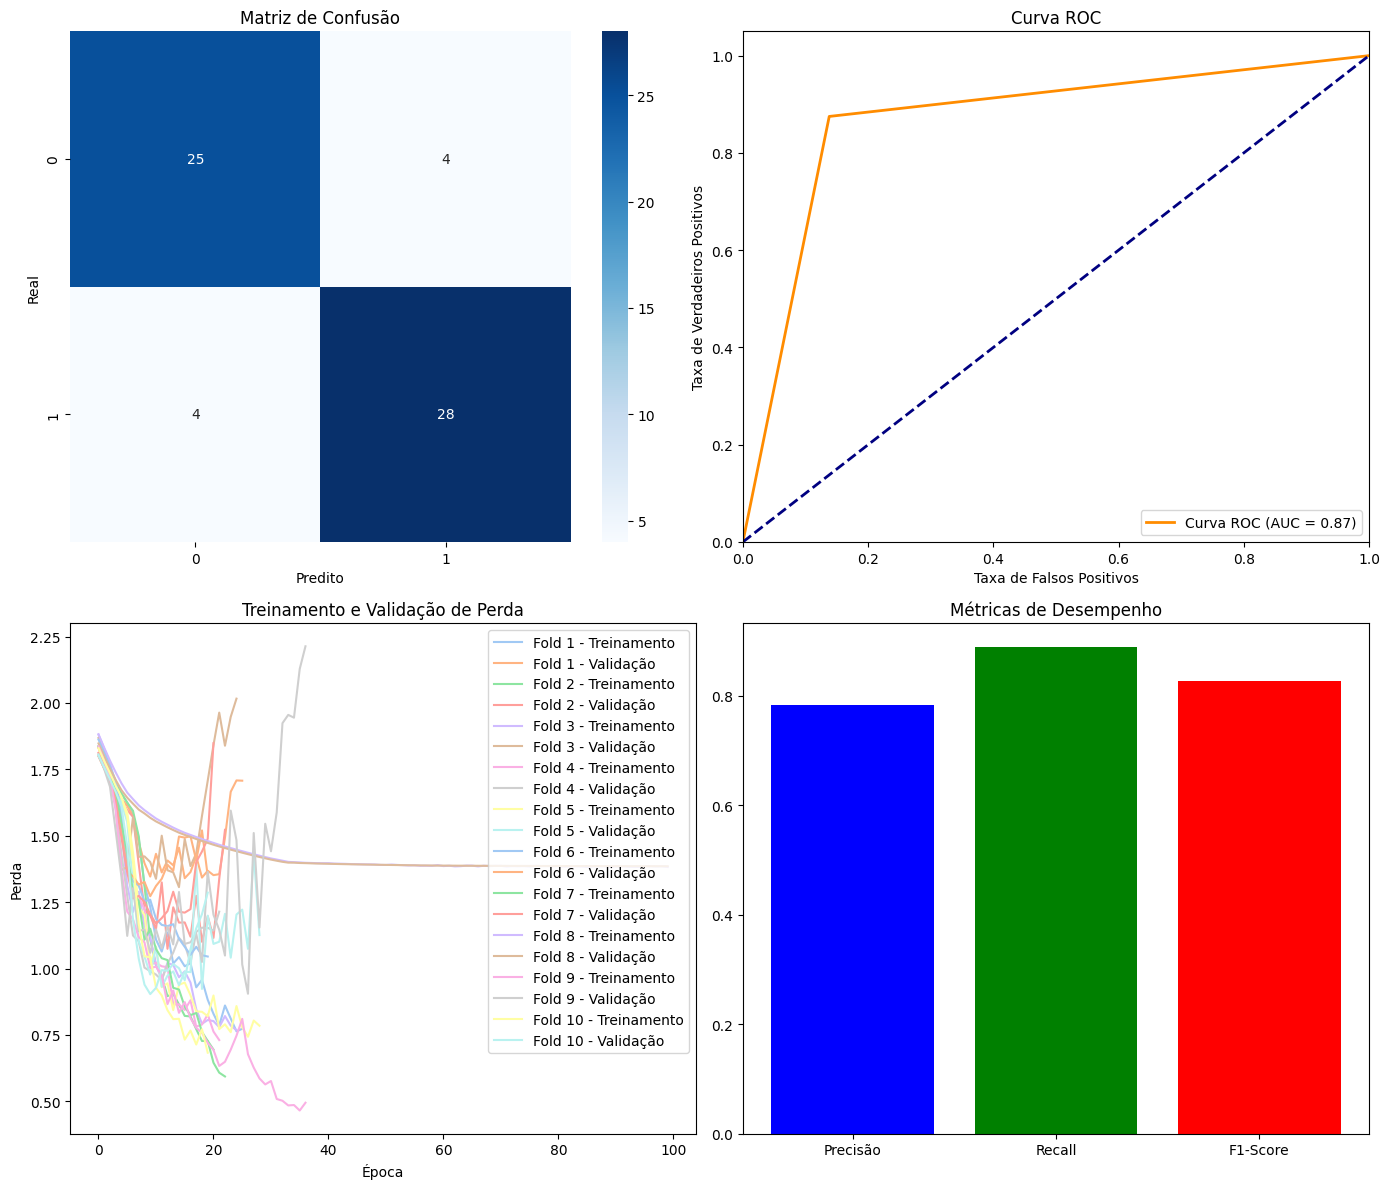

In [45]:
# Plotar as métricas
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plotar a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Matriz de Confusão')
axes[0, 0].set_xlabel('Predito')
axes[0, 0].set_ylabel('Real')

# Plotar a curva ROC
fpr, tpr, _ = roc_curve(np.array(y_test_true).flatten(), np.array(y_test_preds).flatten())
roc_auc = auc(fpr, tpr)
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('Taxa de Falsos Positivos')
axes[0, 1].set_ylabel('Taxa de Verdadeiros Positivos')
axes[0, 1].set_title('Curva ROC')
axes[0, 1].legend(loc='lower right')

# Plotar o gráfico de treinamento e validação de perda
for i in range(len(train_losses)):
    axes[1, 0].plot(train_losses[i], label=f'Fold {i+1} - Treinamento')
    axes[1, 0].plot(val_losses[i], label=f'Fold {i+1} - Validação')
axes[1, 0].set_xlabel('Época')
axes[1, 0].set_ylabel('Perda')
axes[1, 0].set_title('Treinamento e Validação de Perda')
axes[1, 0].legend()

# Plotar as métricas de precisão, recall e F1-score
metrics_df = pd.DataFrame({
    'Métrica': ['Precisão', 'Recall', 'F1-Score'],
    'Valor Médio': [np.mean(precisions), np.mean(recalls), np.mean(f1s)]
})

colors = ['blue', 'green', 'red']  # Cores diferentes para cada métrica
axes[1, 1].bar(metrics_df['Métrica'], metrics_df['Valor Médio'], color=colors)
axes[1, 1].set_title('Métricas de Desempenho')

plt.tight_layout()
plt.show()
